In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
data =pd.read_csv(r"C:\Users\91955\Pictures\start tech internship\ml\my file\ctc prediction.csv")

In [3]:
data.head()

,S.No.,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,1,Tier 1,Manager,Non-Metro,"55,523.00",3,66,19,"71,406.58"
1,2,Tier 2,Executive,Metro,"57,081.00",1,84,18,"68,005.87"
2,3,Tier 2,Executive,Metro,"60,347.00",2,52,28,"76,764.02"
3,4,Tier 3,Executive,Metro,"49,010.00",2,81,33,"82,092.39"
4,5,Tier 3,Executive,Metro,"57,879.00",4,74,32,"73,878.10"


In [4]:
data.describe()

,S.No.,Previous job changes,Graduation marks,Exp (Months)
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,669.500000,2.525411,59.890882,39.207025
std,386.391641,1.123502,14.894696,14.049960
min,1.000000,1.000000,35.000000,18.000000
25%,335.250000,2.000000,47.000000,27.000000
50%,669.500000,3.000000,60.000000,39.000000
75%,1003.750000,4.000000,73.000000,51.000000
max,1338.000000,4.000000,85.000000,64.000000


In [5]:
data.isnull().sum()

S.No.                   0
College                 0
Role                    0
City type               0
Previous CTC            0
Previous job changes    0
Graduation marks        0
Exp (Months)            0
CTC                     0
dtype: int64

In [6]:
drop_col=["S.No."]

In [7]:
data.drop(columns=drop_col,inplace=True)

In [8]:
data["Previous CTC"] = [float(str(i).replace(",", "")) for i in data["Previous CTC"]]

In [9]:
data["CTC"] = [float(str(i).replace(",", "")) for i in data["CTC"]]

In [10]:
data.describe()

,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,55581.762332,2.525411,59.890882,39.207025,75459.339036
std,6685.600553,1.123502,14.894696,14.049960,12551.280147
min,36990.000000,1.000000,35.000000,18.000000,53020.320000
25%,50547.000000,2.000000,47.000000,27.000000,66905.067500
50%,55293.500000,3.000000,60.000000,39.000000,73112.640000
75%,60150.500000,4.000000,73.000000,51.000000,80747.175000
max,77911.000000,4.000000,85.000000,64.000000,123416.990000


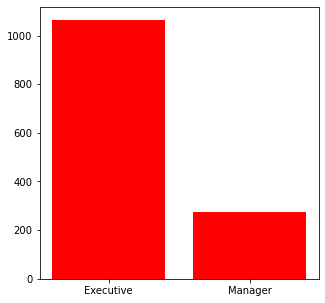

In [11]:
plt.figure(figsize=(5,5))
plt.bar(list(data["Role"].value_counts().keys()),list(data["Role"].value_counts()),color="r")
plt.show()

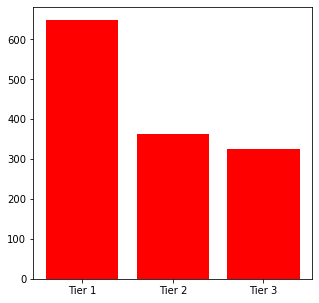

In [12]:
plt.figure(figsize=(5,5))
plt.bar(list(data["College"].value_counts().keys()),list(data["College"].value_counts()),color="r")
plt.show()

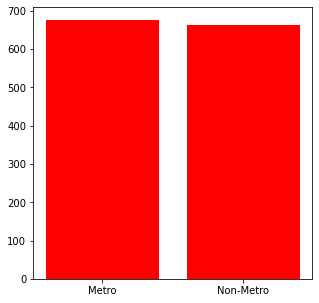

In [13]:
plt.figure(figsize=(5,5))
plt.bar(list(data["City type"].value_counts().keys()),list(data["City type"].value_counts()),color="r")
plt.show()

In [14]:
data["College"].unique()

array(['Tier 1', 'Tier 2', 'Tier 3'], dtype=object)

In [15]:
data["Role"].unique()

array(['Manager', 'Executive'], dtype=object)

In [16]:
data["City type"].unique()

array(['Non-Metro', 'Metro'], dtype=object)

In [17]:
data["College"] =data["College"].map({'Tier 1':3, 'Tier 2':2, 'Tier 3':1})
data["Role"] = data["Role"].map({'Manager' : 1, 'Executive':2})
data["City type"] = data["City type"].map({'Non-Metro':1, 'Metro':2})

In [18]:
data.head()

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC
0,3,1,1,55523.0,3,66,19,71406.58
1,2,2,2,57081.0,1,84,18,68005.87
2,2,2,2,60347.0,2,52,28,76764.02
3,1,2,2,49010.0,2,81,33,82092.39
4,1,2,2,57879.0,4,74,32,73878.10


<AxesSubplot:>

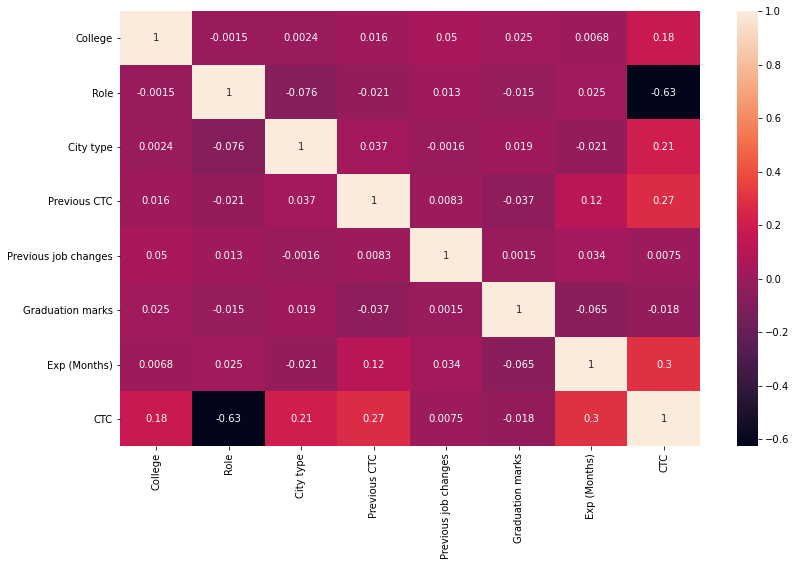

In [19]:
plt.figure(figsize=(13,8))
sns.heatmap(data.corr(),annot=True)

In [20]:
x=data.drop(["CTC"],axis=1)
y=data["CTC"]

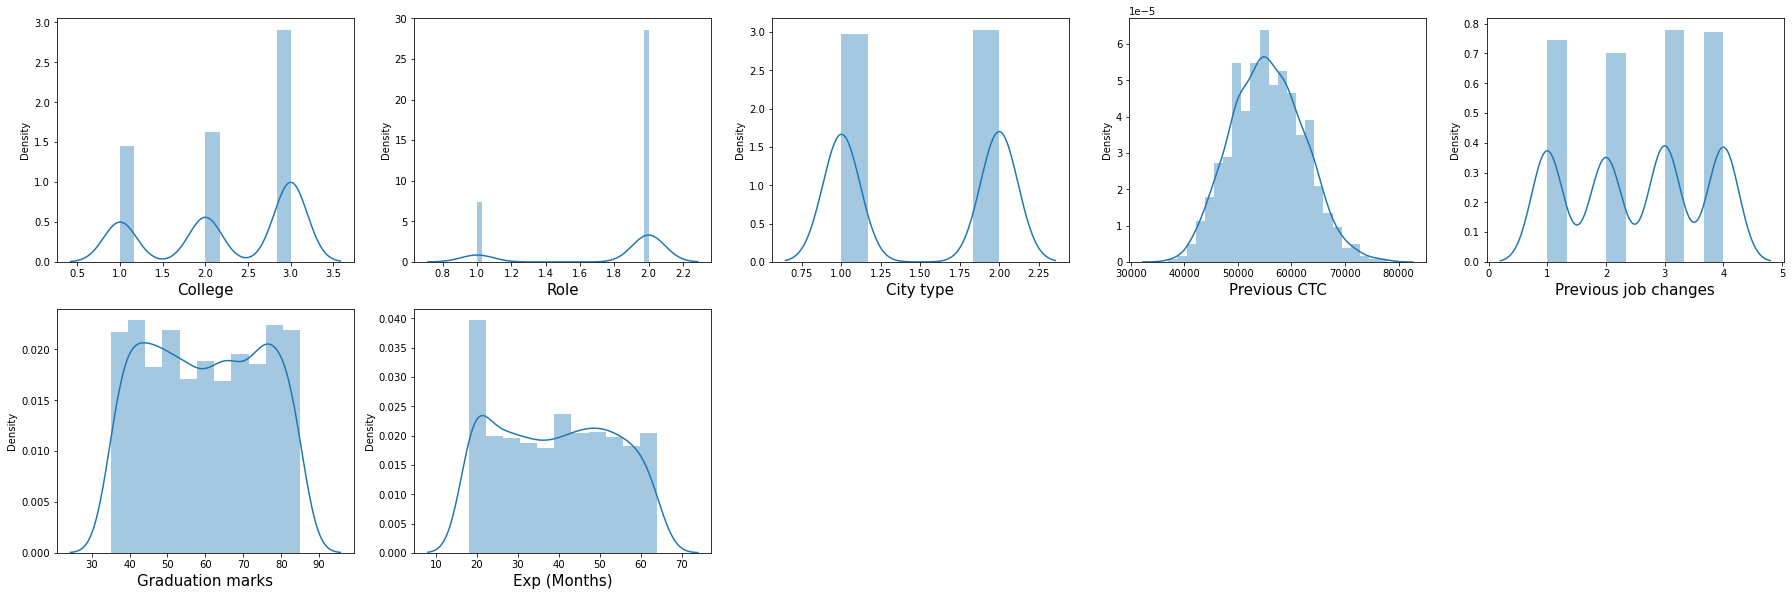

In [21]:
plt.figure(figsize=(25,20))
plotnumber=1

for col in x.columns:
    if plotnumber <= 24:
        ax=plt.subplot(5,5,plotnumber)
        sns.distplot(x[col])
        plt.xlabel(col,fontsize=15)
        
    plotnumber+=1

plt.tight_layout()
plt.show()

In [22]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [23]:
x_scale=scalar.fit_transform(x)

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size= 0.2,random_state=33)

In [25]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [26]:
y_pred = lr.predict(x)

In [27]:
y_pred

array([85580.41906979, 67618.9492507 , 71845.14483795, ...,
       66333.43072449, 65896.5534679 , 89746.46738235])

In [28]:
data["predicted_ctc"]= y_pred

In [29]:
data

,College,Role,City type,Previous CTC,Previous job changes,Graduation marks,Exp (Months),CTC,predicted_ctc
0,3,1,1,55523.0,3,66,19,71406.58,85580.419070
1,2,2,2,57081.0,1,84,18,68005.87,67618.949251
2,2,2,2,60347.0,2,52,28,76764.02,71845.144838
3,1,2,2,49010.0,2,81,33,82092.39,65325.441566
4,1,2,2,57879.0,4,74,32,73878.10,68682.700116
...,...,...,...,...,...,...,...,...,...
1333,1,2,2,59661.0,4,68,50,69712.40,74189.266458
1334,3,2,1,53714.0,1,67,18,69298.75,65496.340230
1335,2,2,1,61957.0,1,47,18,66397.77,66333.430724
1336,3,2,1,53203.0,3,69,21,64044.38,65896.553468
